Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
df= pd.read_csv("gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = df.corr()

<ipython-input-9-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

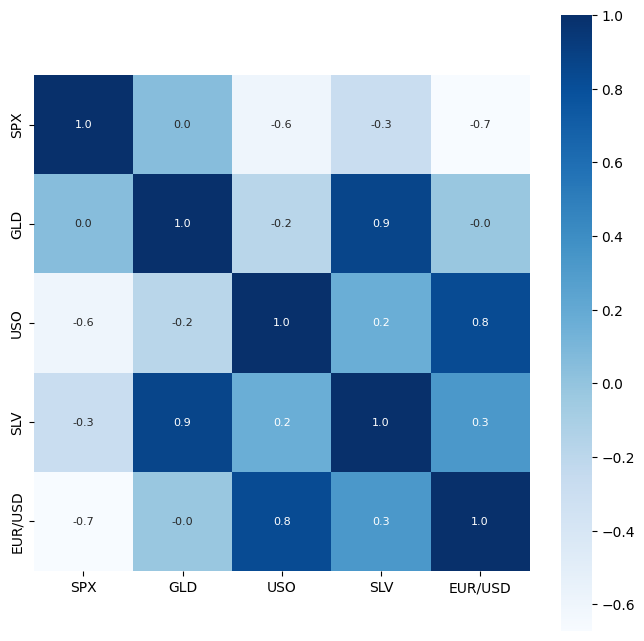

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-2f58f2c760cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='violet')


<Axes: xlabel='GLD', ylabel='Density'>

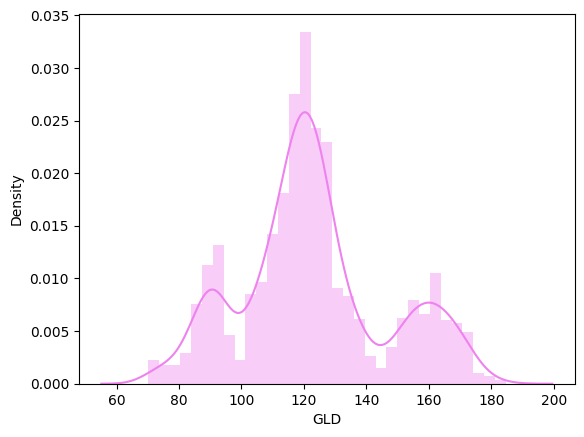

In [15]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='violet')

Splitting the Features and Target

In [17]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [23]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[168.72449911  82.10659997 116.08530044 127.64810078 120.78050123
 154.78389756 149.94309819 126.07800009 117.53689854 125.96410054
 116.55570103 171.69630061 141.59579839 167.78839825 115.02090034
 117.83250045 138.9737024  169.70770056 159.71260235 156.03169925
 155.11520009 125.01880038 175.93539956 157.69720293 125.13810042
  93.6747998   77.87700024 120.74910016 119.11899937 167.54289966
  88.21010025 125.28530038  91.1870011  117.67689992 121.10839892
 136.53060096 115.60830085 115.42870095 147.67220033 107.3911011
 104.63790228  87.19469804 126.46580028 117.87010019 153.66439919
 119.72669992 108.19630038 107.91419842  93.25290098 127.34949686
  75.08670008 113.51839893 121.32500029 111.30039911 118.89859903
 120.81749917 159.70850028 167.64240109 146.87739683  85.81009852
  94.5149005   86.76589888  90.53770019 119.00560081 126.3922009
 127.54910036 168.59920003 122.32469925 117.5954989   98.17890077
 167.78800156 143.15609778 131.65530204 121.23720222 121.30229906
 119.9731003

In [25]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888453297183444


Compare the Actual Values and Predicted Values in a Plot

In [26]:
Y_test = list(Y_test)

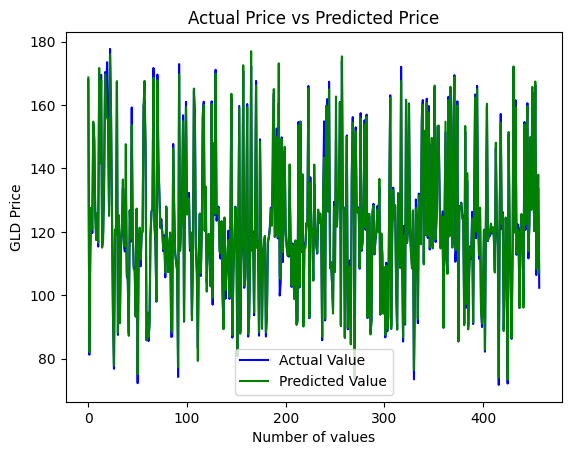

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Storing The Predicted Values vs Actual Values in a csv file.

In [28]:
results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_data_prediction})

In [29]:
results_df.to_csv('predicted_vs_actual.csv', index=False)